In [1]:
import os
import numpy as np
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt

In [2]:
regexp = 'MEG_S01'
df = pd.read_json('MVPA_predicts_{}.json'.format(regexp))
df

,Delta,Theta
0,"[origin, {'y_true': [2, 2, 2, 2, 2, 2, 2, 2, 2...","[origin, {'y_true': [2, 2, 2, 2, 2, 2, 2, 2, 2..."
1,"[xdawn, {'y_true': [2, 2, 2, 2, 2, 2, 2, 2, 2,...","[xdawn, {'y_true': [2, 2, 2, 2, 2, 2, 2, 2, 2,..."


--------------------------------------------------------------------------------
Delta
0 origin
              precision    recall  f1-score   support

           1       0.88      0.75      0.81       392
           2       0.96      0.98      0.97      2321

    accuracy                           0.95      2713
   macro avg       0.92      0.87      0.89      2713
weighted avg       0.95      0.95      0.95      2713

1 xdawn
              precision    recall  f1-score   support

           1       0.92      0.82      0.87       392
           2       0.97      0.99      0.98      2321

    accuracy                           0.96      2713
   macro avg       0.94      0.90      0.92      2713
weighted avg       0.96      0.96      0.96      2713



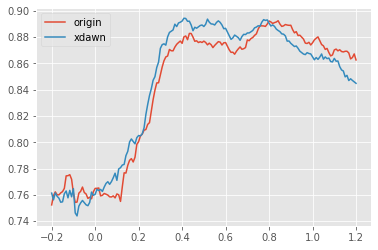

--------------------------------------------------------------------------------
Theta
0 origin
              precision    recall  f1-score   support

           1       0.94      0.44      0.60       392
           2       0.91      1.00      0.95      2321

    accuracy                           0.91      2713
   macro avg       0.93      0.72      0.78      2713
weighted avg       0.92      0.91      0.90      2713

1 xdawn
              precision    recall  f1-score   support

           1       0.84      0.65      0.73       392
           2       0.94      0.98      0.96      2321

    accuracy                           0.93      2713
   macro avg       0.89      0.81      0.85      2713
weighted avg       0.93      0.93      0.93      2713



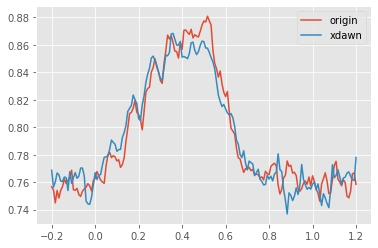

In [6]:
 plt.style.use('ggplot')
for freq in df.columns:
    print('-' * 80)
    print(freq)
    for idx in df[freq].index:
        x = df[freq][idx]
        name = x[0]
        y_true = x[1]['y_true']
        y_pred = x[1]['y_predict']
        y_time_pred = np.array(x[1]['y_time_predict'])
        times = x[1]['times']
        print(idx, name)
        
         # All time report
        print(sklearn.metrics.classification_report(y_pred=y_pred, y_true=y_true))
        # Window time report
        scores = np.zeros(y_time_pred.shape[1])
        for j, y_pred in enumerate(y_time_pred.transpose()):
            scores[j] = sklearn.metrics.precision_score(y_pred=y_pred, y_true=y_true, average='weighted')
        plt.plot(times, scores, label=name)
    plt.legend()
    plt.show()